In [20]:
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append("/data1/sascha/")
import lob_bench.eval as eval
import lob.validation_helpers as valh
import lob.inference_no_errcorr as inference

In [13]:
sys.path

['/data1/sascha/LOBS5',
 '/data1/sascha/AlphaTrade',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python310.zip',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python3.10',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python3.10/lib-dynload',
 '',
 '/home/sascha/miniconda3/envs/alphatrade_new/lib/python3.10/site-packages',
 '/lob_bench',
 '/data1/sascha/lob_bench',
 '/data1/sascha/']

In [17]:
msg_files = sorted(glob("/data1/sascha/data/GOOG2017to2019/" + '*message*.npy'))
book_files = sorted(glob("/data1/sascha/data/GOOG2017to2019/" + '*orderbook*.npy'))
print(len(msg_files))
max(1, int(len(msg_files) * 0.1))

743


74

In [152]:
day=600
m_lob=inference.msg_to_lobster_format(np.load(msg_files[day]))
b_lob=inference.book_to_lobster_format(np.load(book_files[day])).drop(columns=0).rename(columns=lambda x:x-1)
b_lob_dropped=b_lob[1:].reset_index().drop(columns='index')
ask_depths, bid_depths=eval.limit_order_levels(m_lob,b_lob_dropped)

(array([40488., 18245., 16408., 16411., 19121., 15607., 16055., 16620.,
        17145., 16676.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

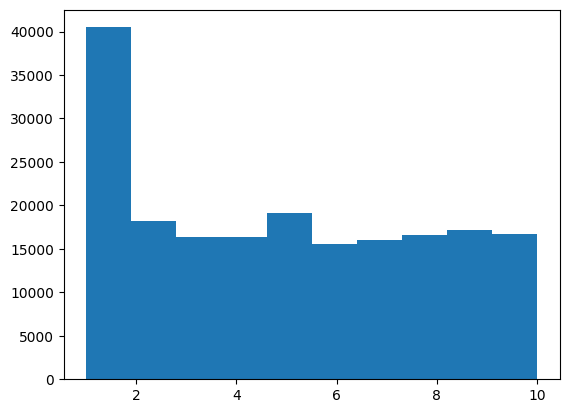

In [153]:
plt.hist(ask_depths)

In [130]:
m_lob

,time,event_type,order_id,size,price,direction
0,25200.435314554,1,3053322,100,1999999900,-1
1,25746.848213676,1,3121458,100,7810000,-1
2,26294.710414180,1,3179126,66,7862000,-1
3,26294.710415715,1,3179130,66,7767300,1
4,26294.711926583,1,3179134,66,7767200,1
...,...,...,...,...,...,...
296692,57897.239892537,3,286396434,150,7857400,-1
296693,57897.240135964,3,286396422,150,7859900,-1
296694,57897.240394077,3,286396430,150,7862200,-1
296695,57897.243715615,1,286396450,74,7854500,-1


In [134]:
b_lob_dropped.reset_index().drop(columns='index')

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,7800000,20,7794500,5,1999999900,100,7710100,2,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1,7800000,20,7794500,5,7810000,100,7710100,2,1999999900,100,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2,7800000,20,7794500,5,7810000,100,7710100,2,7862000,66,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
3,7800000,20,7794500,5,7810000,100,7767300,66,7862000,66,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
4,7800000,20,7794500,5,7810000,100,7767300,66,7862000,66,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296692,7854500,54,7837900,100,7854600,1,7730000,10,7855900,100,...,7620000,10,7910000,10,7600000,68,7915000,50,7597900,200
296693,7854500,54,7837900,100,7854600,1,7730000,10,7855900,100,...,7620000,10,7915000,50,7600000,68,7940000,2,7597900,200
296694,7854500,54,7837900,100,7854600,1,7730000,10,7855900,100,...,7620000,10,7940000,2,7600000,68,7942300,10,7597900,200
296695,7854500,128,7837900,100,7854600,1,7730000,10,7855900,100,...,7620000,10,7940000,2,7600000,68,7942300,10,7597900,200


[16800 16800 16800 ...  7800 14200 14400]
[8121200 8121200 8121200 ... 8103500 8103500 8103500] [8104400 8104400 8104400 ... 8095700 8089300 8089100]


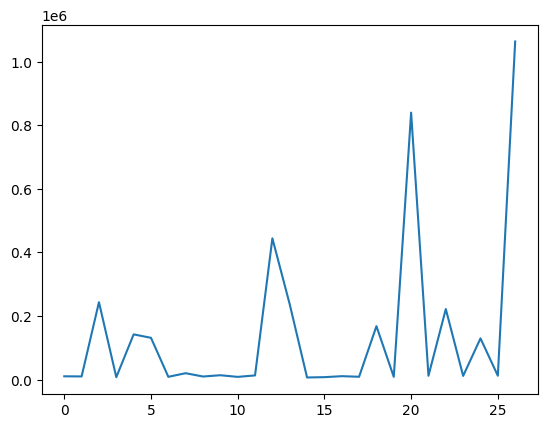

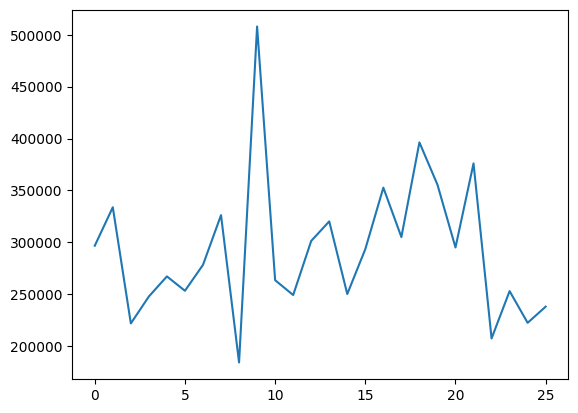

In [178]:
spreads,n_msg=[],[]

for bookfile,msgfile in zip(book_files,msg_files):
    b=np.load(bookfile)
    m=np.load(msgfile)
    b=b[m[:,8]>=34200]
    spread=(b[:,1]-b[:,3]).mean()
    spreads.append(spread)
    if spread > 1e6:
        print(b[:,1]-b[:,3])
        print(b[:,1],b[:,3])
        break
    n_msg.append(b.shape[0])

plt.plot(spreads)
plt.figure()
plt.plot(n_msg)

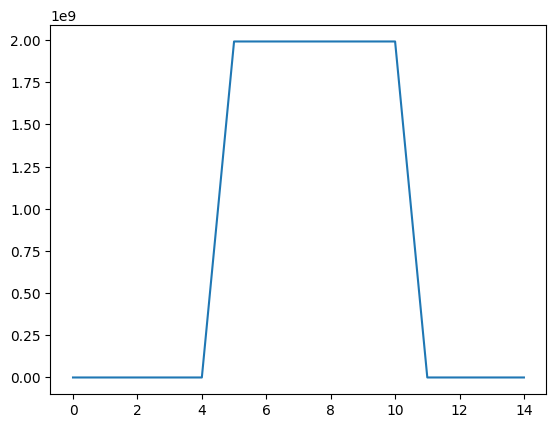

In [190]:
plt.plot((x[:,1]-x[:,3])[12960:12975])

In [191]:
(x[:,1]-x[:,3])[12960:12975]

array([     12200,      12200,      12300,      12400,      12500,
       1991894000, 1991894000, 1991894000, 1991894000, 1991894000,
       1991894000,      36100,      36100,      36100,      36100])

In [175]:
m=np.load('/data1/sascha/data/GOOG2017to2019/GOOG_2017-02-09_24900000_57900000_message_10_proc.npy')

In [197]:
m[m[:,8]>=34200][0]

array([  7712406,         3,         1,   8068400,      -305,       500,
               0, 903009943,     34200,  11839925,      -304,       500,
           34199,  11474895])

In [193]:
x[12960:12975]

array([[          0,     8118100,          60,     8105900,          60,
            8118200,          60,     8104400,           7,     8118300,
                 60,     8100500,         100,     8118400,          60,
            8100000,           3,  1999999900,         100,     8095100,
                 60,  9999999999,           0,     8094900,          60,
         9999999999,           0,     8094800,          60,  9999999999,
                  0,     8094700,          42,  9999999999,           0,
            8070400,           6,  9999999999,           0,     8050000,
                  1],
       [          0,     8118100,          60,     8105900,          60,
            8118200,          60,     8104400,           7,     8118300,
                 60,     8100500,         100,     8118400,          60,
            8100000,           3,  1999999900,         100,     8095100,
                 60,  9999999999,           0,     8094800,          60,
         9999999999,         

In [15]:
x=np.load(msg_files[0])
print(x[-30])
x_targ=x[:,1]-x[:,3]
print(x.shape)
print(pd.DataFrame(x_targ).describe())
plt.hist(x_targ,100,[-999,999])


(522682, 14)

In [22]:
x[x[:,4]<500].shape

array([    -9999,      -257,      -250, ..., 999994678, 999995771,
       999996345])

In [ ]:
np.unique(x[:,-4:])

In [ ]:
df=pd.read_csv("/homes/80/kang/LOBS5/goog_unzip_2019/GOOG_2019-11-21_34200000_57600000_message_10.csv",header=None)

In [ ]:
abs(df[4].diff(1)).describe()